# CS446/519 Homework 1

Read in the metabolic network as a directed bipartite graph (hint: use `graph_from_data_frame`)

In [52]:
library(igraph)
bipartite_df <- read.table("shared/hsmetnet.txt",
                           sep="\t",
                           quote="",
                           header=FALSE,
                           comment.char="",
                           stringsAsFactors=FALSE)

bipartite_graph <- graph_from_data_frame(bipartite_df,
                                        directed=TRUE)


Get the names of all vertices and get a list of indexes of vertices that are metabolites (hint: use `V`, `grep`, and `setdiff`)

In [53]:
vertex_names <- V(bipartite_graph)
N <- length(vertex_names)
reaction_inds <- grep("REACTION", vertex_names$name)
metabolite_inds <- setdiff(1:N, reaction_inds)

How many distinct metabolites are there in the graph? How many reactions? How many edges are there? (hint: use `sprintf`, `length` and `nrow`)

In [54]:
print(sprintf("Number of metabolites: %d", length(metabolite_inds)))
print(sprintf("Number of reactions: %d", length(reaction_inds)))
print(sprintf("Number of edges: %d", nrow(bipartite_df)))

[1] "Number of metabolites: 2340"
[1] "Number of reactions: 5539"
[1] "Number of edges: 19708"


What are the top six metabolites in terms of vertex degree in the graph? (hint: use `degree`, `sort`, and `head`)

In [55]:
metabolite_degrees <- degree(bipartite_graph)[metabolite_inds]
print(head(sort(metabolite_degrees, decreasing=TRUE)))

                                       ATP 
                                      1202 
                                       ADP 
                                       967 
                                 phosphate 
                                       562 
                                   peptide 
                                       456 
[protein] (L-serine/L-threonine) phosphate 
                                       383 
          [protein]-(L-serine/L-threonine) 
                                       383 


Plot the distribution of the degrees of these vertices, on log-log scale.  (hint: use `degree_distribution` in igraph)

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1121 y values <= 0 omitted from logarithmic plot"

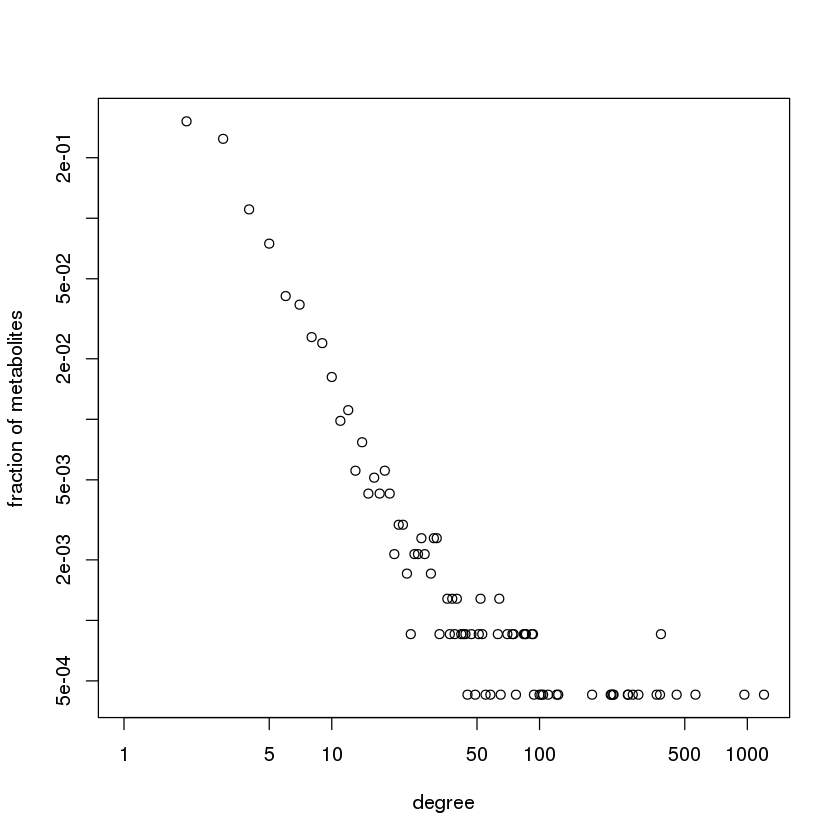

In [56]:
metab_degree_dist <- degree_distribution(bipartite_graph, v=metabolite_inds)
plot(metab_degree_dist, log="xy",
     xlab="degree",
     ylab="fraction of metabolites")

Calculate the exponent α of the best-fit power-law (hint: use `power.law.fit` in igraph)

In [25]:
print(power.law.fit(metabolite_degrees)$alpha)

[1] 2.020247


Calculate the shortest-path-length between all pairs of metabolites (vertices) in the directed graph.  (hint: use `clusters` with `mode=weak` to get the giant weakly-connected component; get the component membership IDs for all metablites using the `membership` item of the components object; select metabolites that have component membership==1; then use `shortest.paths` with `mode=all`)

In [47]:
components <- clusters(bipartite_graph, mode="weak")
vertices_giant_component <- which(components$membership == 1)
vertices_metabs_giant_component <- intersect(metabolite_inds, vertices_giant_component)

metab_dists <- shortest.paths(bipartite_graph, v=vertices_metabs_giant_component,
                              mode="all",
                              to=vertices_metabs_giant_component)

Calculate the average of the shortest-path-length between all pairs of metabolites in the giant (weakly connected) component of the network, by throwing away any shortest-paths distance value if it is infinite. 

In [48]:
print(mean(metab_dists[metab_dists > 0 & metab_dists < Inf]))

[1] 6.799288


Calculate the maximum of the shortest-path-length between all pairs of metabolites (throwing away infinite values, as before) in the giant (weakly connected) component of the network (i.e., you are calculating the diameter of the giant component).

In [49]:
print(max(metab_dists[metab_dists > 0 & metab_dists < Inf]))

[1] 18


Calculate the shortest-paths betweenness centrality for all metabolites in the network. Make sure you compute betweenness centrality only for metabolite vertices, and on the directed graph. (hint: use the `betweenness` function with the `v=<vector of vertex indices>` option)

In [35]:
Nmetab <- length(metabolite_inds)
bc <- betweenness(bipartite_graph, v=metabolite_inds)/((Nmetab-1)*(Nmetab-2))

plot the scatter plot of betweenness centrality vs. vertex degree for all metabolites, on log-log scale.

Warning message in xy.coords(x, y, xlabel, ylabel, log):
"1586 y values <= 0 omitted from logarithmic plot"

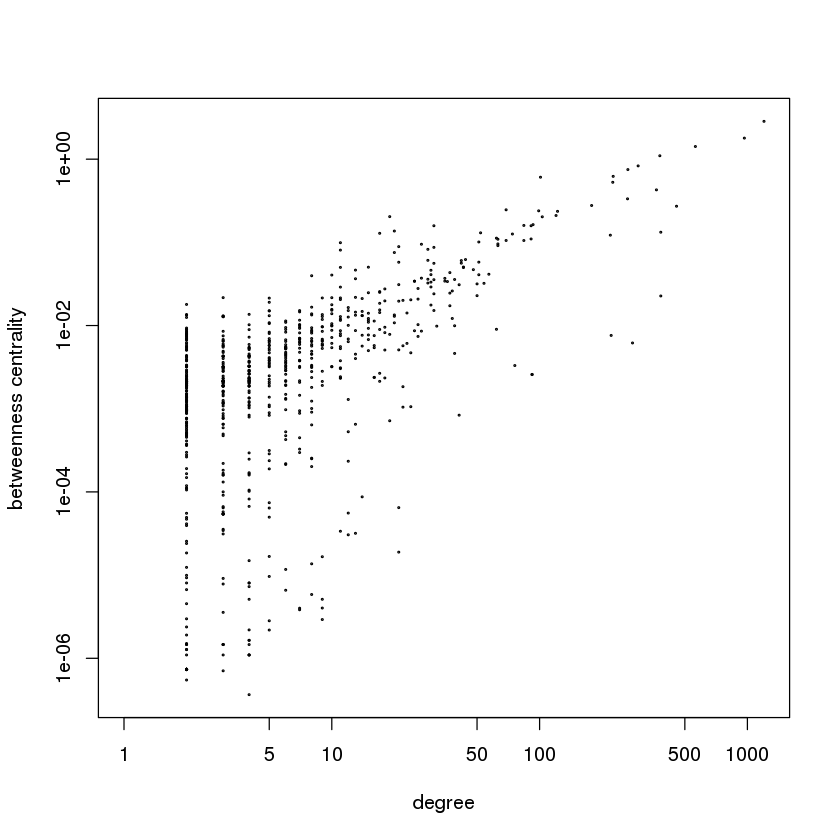

In [51]:
plot(metabolite_degrees, bc, log="xy",
     xlab="degree",
     ylab="betweenness centrality", cex=0.2)

Among metabolites with degree k=2 , what metabolite has highest betweenness centrality in the network? (hint:  use `sort` and `head`)

In [50]:
print(head(sort(bc[metabolite_degrees==2],decreasing=TRUE), n=1))

L-arginino-succinate 
          0.01794253 
